<style> 
    .text_cell_render p {
        font-family: Palatino;
        line-height: 145%;        
    }
    .text_cell_render {
        margin-left:75px;             
    }
    .rendered_html h1 {
        font-family: Helvetica;
        color: #555;
        padding: 10px;
        padding-left: 20px;
        border: 1px solid #AAA;
        box-shadow: 0px 8px 10px -8px #999;
        background: #EEE;
        text-shadow: 0px 1px 1px white;
    }
    .rendered_html h2 {
        font-family: Helvetica;
        border: 1px solid #BBB;
        background: #F9F9F9;
        padding:6px;
        padding-left: 20px;
        color: #4A4A4A;
        box-shadow: 0px 8px 10px -10px #888;
    }
    .rendered_html h3 {
        font-family: Helvetica;
        border-bottom: 1px solid #DDD;
        border-top: 1px solid #DDD;
        padding: 6px;
        margin-top: 16px;
        margin-bottom: 8px;
        padding-left: 20px;
        color: #4A4A4A;
    }
    .rendered_html h6 {
        font-family: Helvetica;
        border-top: 1px solid #DDD;
        color: #555;
        text-align: center;
        padding: 8px;
    }
    .rendered_html hr {
        height: 0px;
    }
    .rendered_html p {
        font-family: Helvetica;
        font-size: 16px;
        color: #090909;
        padding-left: 6px;
        padding-right: 6px;
        line-height: 145%;
    }
    .rendered_html li {
        font-family: Helvetica;
        font-size: 16px;
        color: #090909;
        padding-left: 6px;
        padding-right: 6px;
    }
    .CodeMirror {
         font-family: Consolas, monospace;
         font-size: 9pt;
     }  
    div.cell{
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }    
</style>

## Model simulation: River-contamination case

First, we load in some packages  to enable the necessary functions.

In [2]:
# Load some general packages
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm
import pandas as pd
from scipy.integrate import odeint
from cycler import cycler

plt.rcParams
matplotlib.rcdefaults()
plt.rcParams['mathtext.fontset'] = "cm"

# Increase width of default notebook cell size
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

#Check Python version
import sys
print(sys.version)

%matplotlib inline

3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]


## River-contamination case

Suppose the release of a biodegrable contamination in the river (e.g. illegal industrial release). This release will affect the river downstream and the present oxygen in the river. Information about the oxygen in the river can be given by:

* <b>Dissolved Oxygen (DO)</b>: maximum saturation of DO in water. Fresh water in rivers generally has a DO of around 9 [$\mathrm{mg}~\mathrm{L}^{-1}$]
* <b>Biochemical Oxygen Demand (BOD)</b>: indication of the contamination and represents the amount of oxygen consumption when consumed biologically. In clean fresh water, BOD is generally less than 1 [$\mathrm{mg}~\mathrm{L}^{-1}$]. In contaminated rivers, BOD can be 2-8 [$\mathrm{mg}~\mathrm{L}^{-1}$]

We can develop a model for this system. For this example, we 're not considering the spatial component (i.e. discharge in the river is constant) and as such, we can describe the model in function of the time only:

$$\frac{d BOD}{d t} = BOD_{in} - k_1 \cdot BOD$$
$$\frac{d DO}{d t} = k_2 \cdot (DO_{sat} - DO) - k_1 \cdot BOD$$

with $BOD_{in}$ the BOD-flux of the contamination (expressed in [$\mathrm{mg}~\mathrm{L}^{-1}~\mathrm{min}^{-1}$]), $DO_{sat}$ the saturation constant of dissolved oxygen in water, $k_1$ the microbial degradation rate ($\mathrm{min}^{-1}$) and $k_2$ the rate of oxygen transfer in the atmosphere ($\mathrm{min}^{-1}$).

### Model Setup

Instead lo loaading the function with the model, we will implement it manually as below 

In [5]:
def solve_River_model(t,u,k1,k2,BODin,DOsat,init):
    def model(u,t):
        '''
        Differential equations
        '''
        dBODdt = BODin-k1*u[0]  #BOD (mg/L)
        dDOdt =  k2*(DOsat-u[1])-k1*u[0]  #DO (mg/L)

        return [dBODdt,dDOdt]
    y=odeint(model,init,t)
    return y

### Model simulation

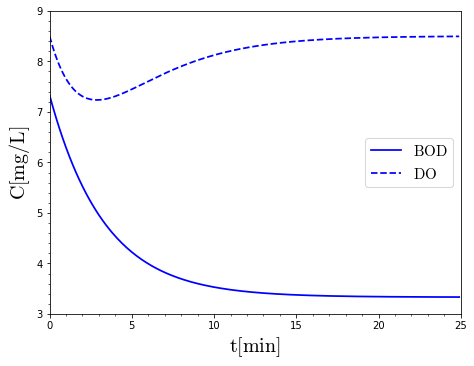

In [6]:
# Definition of initial condition, model parameters and simulation of model
BOD_in = 1 #mg/(L min)
BOD_init = 7.33 #mg/L
DO_init = 8.5 #mg/L 
DOsat = 11 #mg/L
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
BOD = y[:,0]
DO = y[:,1]

# Plot of model
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,BOD,'b-',label = r'$\mathrm{BOD}$',linewidth=1.75)
ax1.plot(time,DO,'b--',label = r'$\mathrm{DO}$',linewidth=1.75)
ax1.set_ylim(3,9)
ax1.set_xlim(0,25)
ax1.legend(loc=5,fontsize=15)
ax1.set_ylabel(r'$\mathrm{C[mg/L]}$', fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

## Sensitivity Analysis

In local sensitivity analysis, the change of the output as a consequence of a change in the input is analysed, expressed mathematically as  $\frac{\partial y(t)}{\partial \theta}$
with $y$ the model output, and $\theta$ the model parameter.

In some occasions, this derivative can be calculated analytically, but in most instances a numeric approximation is made to analyse the sensitivity:

$$\frac{\partial y(t)}{\partial \theta} = \frac{y(t,\theta_j + \Delta \theta_j)-y(t,\theta_j - \Delta \theta_j)}{2\Delta \theta_j}$$

### Absolute sensitivity

$\frac{\partial y(t)}{\partial \theta}$ is also called Centralised Absolute Sensitivity (CAS).

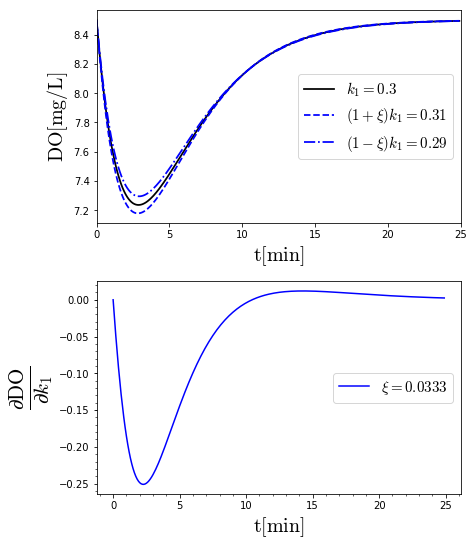

In [7]:
# Initial conditions and model parameters
BOD_in = 1 #mg/(L min)
BOD_init = 7.33 #mg/L
DO_init = 8.5 #mg/L 
DOsat = 11 #mg/L
k1, k2 = 0.3, 0.4 # 1/min
# Range of perturbation factors to test
pertb = [0.31/0.3-1,1e-4,1e-12]
# Index for pertb array
pertb_ix = 0
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1+pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_min = solve_River_model(time,y_init,k1-pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]
deriv_CD = (DO_plus-DO_min)/(2*pertb[pertb_ix]*DO)

# Plot
fig,(ax1,ax2) = plt.subplots(nrows=2,figsize=(6.5,7.5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,DO,'k-',label = r'$k_{1}=0.3$',linewidth=1.75)
ax1.plot(time,DO_plus,'b--',label = r'$(1+\xi)k_{1} =0.31$',linewidth=1.75)
ax1.plot(time,DO_min,'b-.',label = r'$(1-\xi)k_{1} =0.29$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(loc=5,fontsize=15)
ax1.set_ylabel(r'$\mathrm{DO [mg/L]}$',fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()

ax2.plot(time,deriv_CD,'b-',label = r'$\xi=0.0333$')
ax1.set_xlim(0,25)
ax2.legend(loc=5,fontsize=15)
ax2.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial k_{1}}$',fontsize=30)
ax2.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

#### Effect of the perturbation factor

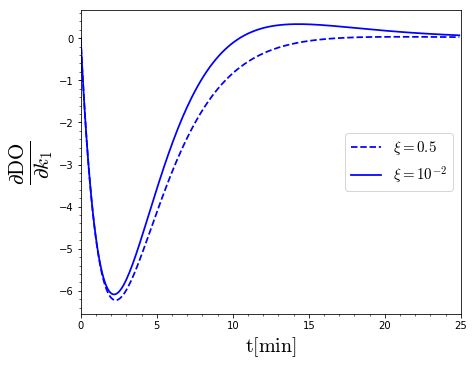

In [8]:
# Initial conditions and model parameters
BOD_in = 1 #mg/(L min)
BOD_init = 7.33 #mg/L
DO_init = 8.5 #mg/L 
DOsat = 11 #mg/L
pertb = [0.5,1e-2]#,1e-3]
pertb_ix = 0
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1+pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_min = solve_River_model(time,y_init,k1-pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_plus1 = solve_River_model(time,y_init,k1+pertb[pertb_ix+1]*k1,k2,BOD_in,DOsat,init)
y_min1 = solve_River_model(time,y_init,k1-pertb[pertb_ix+1]*k1,k2,BOD_in,DOsat,init)
DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]

DO_plus1 = y_plus1[:,1]
DO_min1 = y_min1[:,1]

deriv_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k1)
deriv_CD1 = (DO_plus1-DO_min1)/(2*pertb[pertb_ix+1]*k1)

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,deriv_CD,'b--',label = r'$\xi=0.5$',linewidth=1.75)
ax1.plot(time,deriv_CD1,'b-',label = r'$\xi=10^{-2}$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(loc=5,fontsize=15)
ax1.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial k_{1}}$',fontsize=30)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

#### Comparison of different perturbation factors affected by solver precision 

For $k_1$

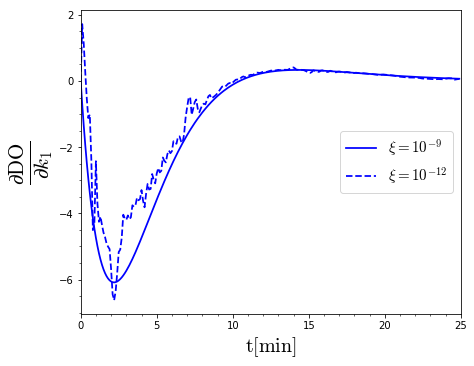

In [9]:
pertb = [1e-9,1e-12]#,1e-3]
pertb_ix = 0
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1+pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_min = solve_River_model(time,y_init,k1-pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_plus1 = solve_River_model(time,y_init,k1+pertb[pertb_ix+1]*k1,k2,BOD_in,DOsat,init)
y_min1 = solve_River_model(time,y_init,k1-pertb[pertb_ix+1]*k1,k2,BOD_in,DOsat,init)
DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]
DO_plus1 = y_plus1[:,1]
DO_min1 = y_min1[:,1]
deriv_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k1)
deriv_CD1 = (DO_plus1-DO_min1)/(2*pertb[pertb_ix+1]*k1)

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,deriv_CD,'b-',label = r'$\xi=10^{-9}$',linewidth=1.75)
ax1.plot(time,deriv_CD1,'b--',label = r'$\xi=10^{-12}$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(loc=5,fontsize=15)
ax1.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial k_{1}}$',fontsize=30)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

For $k_2$

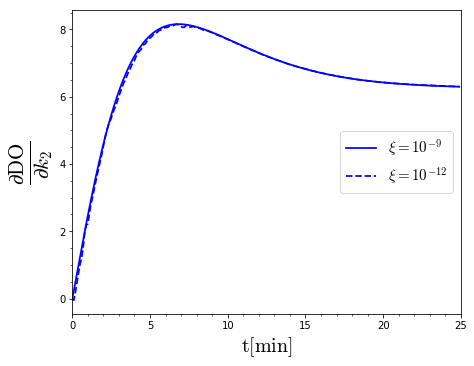

In [8]:
pertb = [1e-9,1e-12]#,1e-3]
pertb_ix = 0
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1,k2+pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_min = solve_River_model(time,y_init,k1,k2-pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_plus2 = solve_River_model(time,y_init,k1,k2+pertb[pertb_ix+1]*k2,BOD_in,DOsat,init)
y_min2 = solve_River_model(time,y_init,k1,k2-pertb[pertb_ix+1]*k2,BOD_in,DOsat,init)
DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]
DO_plus2 = y_plus2[:,1]
DO_min2= y_min2[:,1]
deriv_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k2)
deriv_CD2 = (DO_plus2-DO_min2)/(2*pertb[pertb_ix+1]*k2)

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,deriv_CD,'b-',label = r'$\xi=10^{-9}$',linewidth=1.75)
ax1.plot(time,deriv_CD2,'b--',label = r'$\xi=10^{-12}$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(loc=5,fontsize=15)
ax1.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial k_{2}}$',fontsize=30)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

#### Screen for optimal perturbation factor using the SSE and SAE metrics 

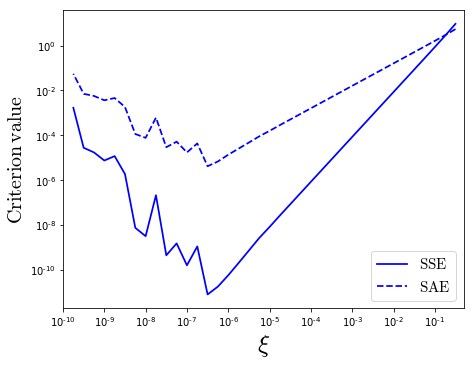

Optimal perturbation value: 3.1623e-07


In [12]:
# Range of perturbation factors to be considered
pertbs = 10.**(-np.arange(0.5, 10., 0.25))

k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init
sum2SSE = np.array([])
sumSAE = np.array([])

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
N = np.size(pertbs)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
DO = y[:,1]

# Test all perturbation factors calculating it with two metrics
for pertb in pertbs:
    y_plus = solve_River_model(time,y_init,k1+pertb*k1,k2,BOD_in,DOsat,init)
    y_min = solve_River_model(time,y_init,k1-pertb*k1,k2,BOD_in,DOsat,init)
    DO_plus = y_plus[:,1]
    DO_min = y_min[:,1]
    deriv_plus  = (DO_plus-DO)/(pertb*k1)
    deriv_min = (DO-DO_min)/(pertb*k1)
    sum2SSE = np.append(sum2SSE,np.sum((deriv_plus-deriv_min)**2))
    sumSAE  = np.append(sumSAE,np.sum(np.abs(deriv_plus-deriv_min)))
SSE = sum2SSE/N
SAE = sumSAE/N

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(pertbs,SSE,'b-',label = r'$\mathrm{SSE}$',linewidth=1.75)
ax1.plot(pertbs,SAE,'b--',label = r'$\mathrm{SAE}$',linewidth=1.75)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e-10,5e-1)
ax1.legend(loc=4,fontsize=15)
ax1.set_ylabel(r'$\mathrm{Criterion\/value}$',fontsize=20)
ax1.set_xlabel(r'$\xi$', fontsize=25,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
locmaj = ticker.LogLocator(base=10,numticks=12) 
ax1.xaxis.set_major_locator(locmaj)
plt.show()

# Report value of the perturbation factor
pertb_opt = pertbs[np.where(SSE==np.min(SSE))[0][0]]
print('Optimal perturbation value: {:.4e}'.format(pertb_opt))


### Relative sensitivity

We will calculate the relative sensitivity of the model parameters using differen sensitivity functions.

Parameter relative sensitivity:
$$
\frac{\partial y(t)}{\partial \theta}\theta
$$
Variable relative sensitivity:
$$
\frac{\partial y(t)}{\partial\theta}\frac{1}{y(t)}
$$
Total relative sensitivity:
$$
\frac{\partial y(t)}{\partial \theta}\frac{\theta}{y(t)}
$$

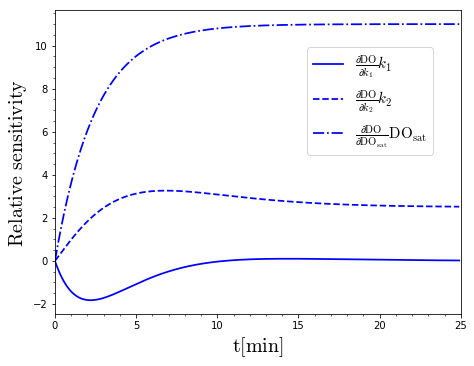

In [13]:
pertb = [pertb_opt] # get the optimal perturbation value
pertb_ix = 0
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1+pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_min = solve_River_model(time,y_init,k1-pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_plus1 = solve_River_model(time,y_init,k1,k2+pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_min1 = solve_River_model(time,y_init,k1,k2-pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_plus2 = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat+pertb[pertb_ix]*DOsat,init)
y_min2 = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat-pertb[pertb_ix]*DOsat,init)
DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]
DO_plus1 = y_plus1[:,1]
DO_min1 = y_min1[:,1]
DO_plus2 = y_plus2[:,1]
DO_min2 = y_min2[:,1]
relk1  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k1)*k1
relk2 = (DO_plus1-DO_min1)/(2*pertb[pertb_ix]*k2)*k2
relDOsat  = (DO_plus2-DO_min2)/(2*pertb[pertb_ix]*DOsat)*DOsat

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,relk1,'b-',label = r'$\frac{\partial\mathrm{DO}}{\partial k_{1}}k_1$',linewidth=1.75)
ax1.plot(time,relk2,'b--',label = r'$\frac{\partial\mathrm{DO}}{\partial k_{2}}k_2$',linewidth=1.75)
ax1.plot(time,relDOsat,'b-.',label = r'$\frac{\partial\mathrm{DO}}{\partial \mathrm{DO_{sat}}}\mathrm{DO_{sat}}$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(bbox_to_anchor=(0.95,0.7),fontsize=15)
ax1.set_ylabel(r'$\mathrm{Relative\/\/sensitivity}$',fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

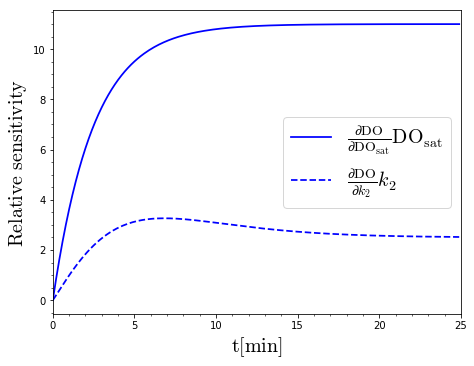

In [14]:
pertb = [pertb_opt] # optimal perturbation value
pertb_ix = 0
DOsat = 11 # mg/L
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat+pertb[pertb_ix]*DOsat,init)
y_min = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat-pertb[pertb_ix]*DOsat,init)
y_plus1 = solve_River_model(time,y_init,k1,k2+pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_min1 = solve_River_model(time,y_init,k1,k2-pertb[pertb_ix]*k2,BOD_in,DOsat,init)

DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]
DO_plus1 = y_plus1[:,1]
DO_min1 = y_min1[:,1]
relDOsat  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*DOsat)*DOsat
relk2 = (DO_plus1-DO_min1)/(2*pertb[pertb_ix]*k2)*k2

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,relDOsat,'b-',label = r'$\frac{\partial\mathrm{DO}}{\partial \mathrm{DO_{sat}}}\mathrm{DO_{sat}}$',linewidth=1.75)
ax1.plot(time,relk2,'b--',label = r'$\frac{\partial\mathrm{DO}}{\partial k_{2}}k_2$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(loc=5,fontsize=20)
ax1.set_ylabel(r'$\mathrm{Relative\/\/sensitivity}$',fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

#### Total relative sensitivity 

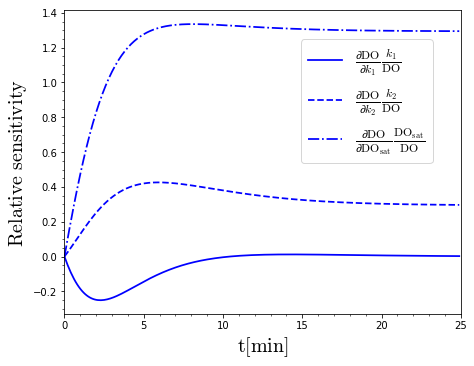

In [15]:
pertb = [pertb_opt] #get the optimal perturbation value
pertb_ix = 0
k1, k2 = 0.3, 0.4 # 1/min
init = [BOD_init,DO_init]
y_init = init

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
y = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat,init)
y_plus = solve_River_model(time,y_init,k1+pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_min = solve_River_model(time,y_init,k1-pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
y_plus1 = solve_River_model(time,y_init,k1,k2+pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_min1 = solve_River_model(time,y_init,k1,k2-pertb[pertb_ix]*k2,BOD_in,DOsat,init)
y_plus2 = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat+pertb[pertb_ix]*DOsat,init)
y_min2 = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat-pertb[pertb_ix]*DOsat,init)
DO = y[:,1]
DO_plus = y_plus[:,1]
DO_min = y_min[:,1]
DO_plus1 = y_plus1[:,1]
DO_min1 = y_min1[:,1]
DO_plus2 = y_plus2[:,1]
DO_min2 = y_min2[:,1]
relk1  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k1)*k1
relk2 = (DO_plus1-DO_min1)/(2*pertb[pertb_ix]*k2)*k2
relDOsat  = (DO_plus2-DO_min2)/(2*pertb[pertb_ix]*DOsat)*DOsat


# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax1.plot(time,relk1/DO,'b-',label = r'$\frac{\partial\mathrm{DO}}{\partial k_{1}}\frac{k_1}{\mathrm{DO}}$',linewidth=1.75)
ax1.plot(time,relk2/DO,'b--',label = r'$\frac{\partial\mathrm{DO}}{\partial k_{2}}\frac{k_2}{\mathrm{DO}}$',linewidth=1.75)
ax1.plot(time,relDOsat/DO,'b-.',label = r'$\frac{\partial\mathrm{DO}}{\partial \mathrm{DO_{sat}}}\frac{\mathrm{DO_{sat}}}{\mathrm{DO}}$',linewidth=1.75)
ax1.set_xlim(0,25)
ax1.legend(bbox_to_anchor=(0.95,0.7),fontsize=17)
ax1.set_ylabel(r'$\mathrm{Relative\/\/sensitivity}$',fontsize=20)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
plt.minorticks_on()
plt.show()

#### Ranking of sensitivities

Root mean square of total relative sensitivies:

$$
S_{i,j,k} = \frac{\partial y(t)}{\partial \theta}\frac{\theta}{y(t)}
$$
At a time instant $k$:
$$
\delta^{rms}_{j,k} = \sqrt{\frac{\sum^{N_q}_{i=1}(S^2_{i,j,k})}{N_q}} 
$$
being $N_q$ the total number of variables ($1:i:q$).

Time-average:
$$
\delta^{rms}_{j} = \frac{1}{N}\sum^{N}_{k=1} \delta^{rms}_{j,k}
$$
being $N$ the total number of time samples ($1:k:N$).

Example for $k_1$ (change parameters for $k_2$ and $DO_{sat}$)

In [29]:
# Define the different time stepping schemes to test
time1 = np.arange(0,2+0.1,0.1)
time2 = np.arange(0,20+2,2)
time3 = np.arange(0,10+2,2)
time4 = np.arange(10,20+2,2)
dict_times = {'1':time1,'2':time2,'3':time3,'4':time4}

pertb = [pertb_opt] #get the optimal perturbation value
pertb_ix = 0
k1, k2 = 0.3, 0.4 # 1/min
init   = [BOD_init,DO_init]
y_init = init
deltarmsk1_avg    = np.array([])
deltarmsk2_avg    = np.array([])
deltarmsDOsat_avg = np.array([])

# Example for k1
for time_case in dict_times:
    N = np.size(dict_times[time_case])
    y = solve_River_model(dict_times[time_case],y_init,k1,k2,BOD_in,DOsat,init)
    BOD = y[:,0] 
    DO  = y[:,1]
    y_plus = solve_River_model(dict_times[time_case],y_init,k1+pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
    y_min = solve_River_model(dict_times[time_case],y_init,k1-pertb[pertb_ix]*k1,k2,BOD_in,DOsat,init)
    BOD_plus = y_plus[:,0]
    BOD_min  = y_min[:,0]
    DO_plus  = y_plus[:,1]
    DO_min   = y_min[:,1]
    #dBOD_total_CD = (BOD_plus-BOD_min)/(2*pertb[pertb_ix]*k1)*k1/BOD
    dDO_total_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k1)*k1/DO
    deltarmsk1_avg = np.append(deltarmsk1_avg,np.average((dDO_total_CD**2)**(0.5)))

# Report of model parameter importance based on ranking values
print('Ranking values for $k_1$: Scheme 1: {:.4f}, Scheme 2: {:.4f}, Scheme 3: {:.4f}, Scheme 4: {:.4f}'\
    .format(deltarmsk1_avg[0],deltarmsk1_avg[1],deltarmsk1_avg[2],deltarmsk1_avg[3]))


Ranking values for $k_1$: Scheme 1: 0.1631, Scheme 2: 0.0572, Scheme 3: 0.0971, Scheme 4: 0.0971


#### Local effect of local sensitivity

Example worked for $k_1$ (uncomment appropriate code lines for $k_2$, and $DO_{in}$)

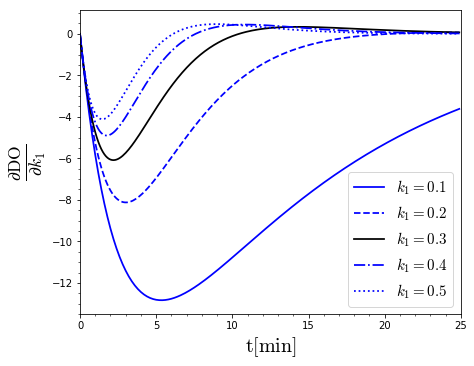

In [131]:
# Initial conditions
BOD_in = 1 #mg/(L min)
BOD_init = 7.33 #mg/L
DO_init = 8.5 #mg/L 
pertb = [pertb_opt]
pertb_ix = 0
init = [BOD_init,DO_init]
y_init = init

# Define ranges for each parameter
DOsat_r = np.arange(8,13,1)
k1_r = np.arange(0.1,0.6,0.1)
k2_r = np.arange(0.1,0.6,0.1)

# Solve system and derivative by central differences
time = np.arange(0.,25,0.1)
N = np.size(pertbs)

# Plot
fig,ax1 = plt.subplots(nrows=1,figsize=(6.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
colors =iter(['b', 'b', 'k', 'b','b'])
lines = iter(['-', '--', '-', '-.',':'])
labels = iter([r'$k_1 = 0.1$',r'$k_1 = 0.2$',r'$k_1 = 0.3$',r'$k_1 = 0.4$',r'$k_1 = 0.5$'])
#labels = iter([r'$k_2 = 0.1$',r'$k_2 = 0.2$',r'$k_2 = 0.3$',r'$k_2 = 0.4$',r'$k_2 = 0.5$'])
#labels = iter([r'$\mathrm{DO_{sat}} = 8$',r'$\mathrm{DO_{sat}} = 9$',r'$\mathrm{DO_{sat}} = 10$',
               #r'$\mathrm{DO_{sat}} = 11$',r'$\mathrm{DO_{sat}} = 12$'])
for k1_i in k1_r:
#for k2_i in k2_r:
#for DOsat_i in DOsat_r:
    y_plus = solve_River_model(time,y_init,k1_i+pertb[pertb_ix]*k1_i,k2,BOD_in,DOsat,init)
    y_min = solve_River_model(time,y_init,k1_i-pertb[pertb_ix]*k1_i,k2,BOD_in,DOsat,init)
    #y_plus = solve_River_model(time,y_init,k1,k2_i+pertb[pertb_ix]*k2_i,BOD_in,DOsat,init)
    #y_min = solve_River_model(time,y_init,k1,k2_i-pertb[pertb_ix]*k2_i,BOD_in,DOsat,init)
    #y_plus = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat_i+pertb[pertb_ix]*DOsat_i,init)
    #y_min = solve_River_model(time,y_init,k1,k2,BOD_in,DOsat_i-pertb[pertb_ix]*DOsat_i,init)
    DO_plus = y_plus[:,1]
    DO_min = y_min[:,1]
    deriv_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k1_i)
    #deriv_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*k2_i)
    #deriv_CD  = (DO_plus-DO_min)/(2*pertb[pertb_ix]*DOsat_i)
    ax1.plot(time,deriv_CD,label = next(labels),color=next(colors),linestyle=next(lines),linewidth=1.75)

ax1.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial k_{1}}$',fontsize=25)
#ax1.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial k_{2}}$',fontsize=25)
#ax1.set_ylabel(r'$\frac{\partial\mathrm{DO}}{\partial \mathrm{DO_{sat}}}$',fontsize=25)
ax1.set_xlabel(r'$\mathrm{t[min]}$', fontsize=20,rotation=0)
ax1.set_xlim(0,25)
ax1.legend(loc=4,fontsize=15)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax1.minorticks_on()
plt.show()